In [217]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [218]:
t, m, b, k = sp.symbols('t m b k')
y = sp.Function('y')
v = sp.diff(y(t),t)
a = sp.diff(y(t),t,t)
# f_ext = 5*sp.cos(t*sp.Rational(1/2))
f_ext = 5
f_ext

5

In [219]:
m = 1
b = sp.Rational(1,5)
k = 6

In [220]:
ode = sp.Eq(m*a + b*v + k*y(t), f_ext)
ode

Eq(6*y(t) + Derivative(y(t), t)/5 + Derivative(y(t), (t, 2)), 5)

In [221]:
y_sol_part = sp.dsolve(ode)
y_sol_comp = sp.dsolve(ode, ics={y(0):0, sp.diff(y(t),t).subs(t,0):0})

In [222]:
partes = y_sol_part.rhs
partes.args

(5/6, (C1*sin(sqrt(599)*t/10) + C2*cos(sqrt(599)*t/10))*exp(-t/10))

In [223]:
temp = partes.args[0:len(partes.args)-1]
particular = 0
for i in range(len(temp)):
    particular = particular + temp[i]
particular_num = sp.lambdify(t, particular)

In [224]:
completa_num = sp.lambdify(t, y_sol_comp.rhs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


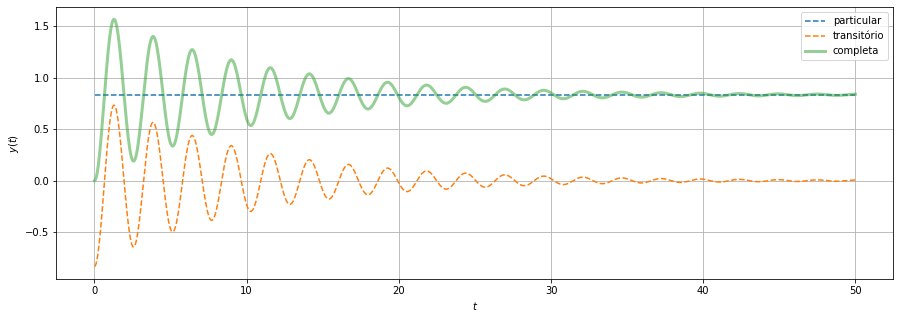

In [225]:
tt = np.linspace(0, 50, 1000)
plt.figure(figsize=(15,5))
plt.plot(tt, tt/tt*particular_num(tt), label='particular', ls='--')
plt.plot(tt, completa_num(tt) - particular_num(tt), label='transitório', ls='--')
plt.plot(tt, completa_num(tt), label='completa', lw=3, alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.grid()
plt.show()